# Aprendizaje supervisado

## Regresión Lineal Simple


### Modelo

Dado un conjunto de $m$ datos estadísticos $S$ conformado por la relación de dos variables dependientes $X$ e $Y$, tal que $ S = \{(x^{(1)},y^{(1)}), ... ,(x^{(m)},y^{(m)}) \} $. El modelo asume que estas variables se poseen  una relación lineal, se define la función de hipótesis $h_\theta(x^{(i)})$ como una aproximación al valor real de $y^{(i)}$.

$$h_\theta(x^{(i)}) = \theta_0 + x^{(i)} \theta_1$$ Con $\theta_0, \theta_1 \in \!R$

Con una buena función hipótesis se podrá predecir cuál será el valor $y$ para un $x$ determinado.

### Objetivo

Se desea determinar los valores de los parámetros $\theta_0$ y $\theta_1$ que mejor representen la relación entre las variables $x$ e $y$. Se define la función de costo $J(\theta_0, \theta_1)$ como una medida del **Error** de nuestra función hipótesis. Una buena aproximación es aquella con el **menor error**, es por esto que nuestro objetivo es: **Determinar los valores de $\theta_0$ y $\theta_1$ donde la función $J(\theta_0, \theta_1)$ sea un mínimo**

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + x^{(i)} \theta_1 - y^{(i)})^2$$

### Gradient Descent

_Gradient Descent_ es un algoritmo que nos permite hallar un mínimo local de una función sin usar un método numérico. Este consiste en ir tomando pequeños pasos proporcionales al negativo del **gradiente**. Definimos Gradient Descent para nuestra regresión lineal univariada:

\begin{align}
    \theta_0 &= \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \\
    \theta_1 &= \theta_1 - \alpha \frac{\partial }{\partial \theta_1} J(\theta_0, \theta_1) = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) * x^{(i)}
\end{align}

Es necesario notar que la función de costo depende de $\theta_0$ y $\theta_1$, se define **$\alpha$** como el factor de aprendizaje (_learning rate_). Además se debe realizar el calculo de manera simultanea, esto quiere decir que el nuevo valor de $\theta_0$ no debe influir en el calculo de nuevo valor de $\theta_1$.

### Ejemplo

Se utilizará el _dataset_ boston house-prices del módulo sklearn. 

In [239]:
# Import modules
from sklearn.datasets import load_boston, load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ipywidgets import IntSlider, interact, fixed

sns.set()

%matplotlib inline

#### Cargar datos

El primer paso es cargar los datos y realizar un primer plot para conocer nuestro dataset. 

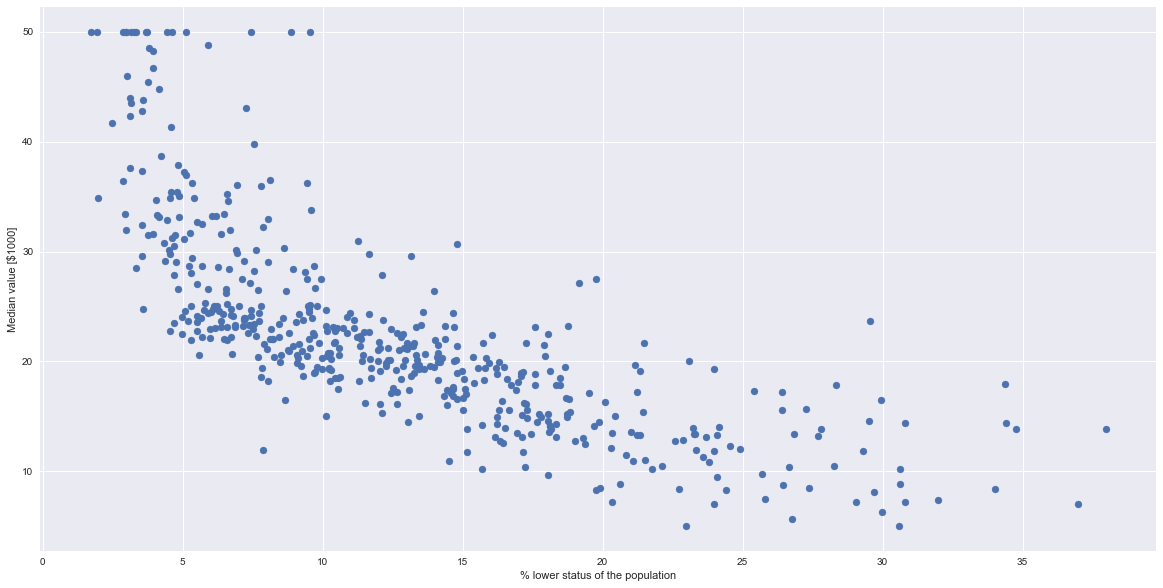

In [250]:
data, target = load_boston(True)

x = data[:,12]
y = target

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.ylabel("Median value [$1000]")
plt.xlabel("% lower status of the population")
plt.show()

In [195]:
# Funcion Hipotesis H
def hip(X, theta0, theta1):
    # X     : vector
    # theta0: scalar
    # theta1: scalar
    return theta0 + theta1*X

# Funcion de Costo J
def J(theta0, theta1, X, Y):
    # X     : vector
    # Y     : vector
    # theta0: scalar
    # theta1: scalar
    m  = x.size
    return  (1/(2*m))* np.sum((hip(X, theta0, theta1)-Y)**2)

# Derivada parcial en theta0 de J
def dJdt0(theta0, theta1, X, Y):
    # X     : vector
    # Y     : vector
    # theta0: scalar
    # theta1: scalar
    m  = x.size
    return (1/m)* np.sum((hip(X, theta0, theta1)-Y))

# Derivada parcial en theta1 de J
def dJdt1(theta0, theta1, X, Y):
    # X     : vector
    # Y     : vector
    # theta0: scalar
    # theta1: scalar
    m  = x.size
    return (1/m)* np.sum((hip(X, theta0, theta1)-Y)*X)

def GradientDescent(X, Y, alpha, epsilon=0.01):
    # X     : vector
    # Y     : vector
    
    #inicializamos valores para theta0 y theta1
    theta0 = np.random.rand()*10
    theta1 = np.random.rand()*10
    
    hist = [(theta0, theta1)]
    
    converge = False
    while not converge:
        # Calculamos los nuevos thetas
        ntheta0 = theta0 - alpha*dJdt0(theta0, theta1, X, Y)
        ntheta1 = theta1 - alpha*dJdt1(theta0, theta1, X, Y)

        # Converge si el cambio de los parametros es menor a epsilon
        converge = np.linalg.norm((theta0 - ntheta0, theta1 - ntheta1)) < epsilon

        # Guardamos como van cambiando los thetas
        hist.append((ntheta0, ntheta1))

        # actualizamos los parametros
        theta0, theta1 = ntheta0, ntheta1
    
    return theta0, theta1, hist


In [224]:
theta0, theta1, hist = GradientDescent(x, y, 1e-4,  1e-4)
print("theta0: %f\ntheta1: %f" % (theta0, theta1))

theta0: 30.400771
theta1: -0.700711


### Mostrar resultados

Determinar que nuestro algoritmo funciona correctamentes significa que, en cada iteración $J(\theta_0 \theta_1)$ reduce su valor

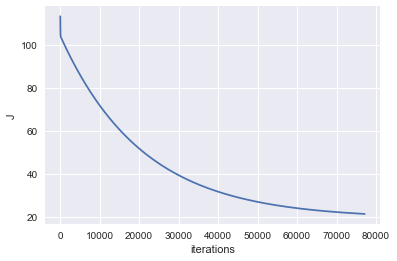

In [225]:
thetas = np.array(hist)
jmin = np.apply_along_axis(lambda t: J(t[0], t[1], x, y), 1, thetas)

plt.plot(jmin)
plt.ylabel("J")
plt.xlabel("iterations")
plt.show()

In [249]:
def plotter(thetas, iteration, X, Y):
    model = hip(np.arange(X.max()), thetas[iteration][0], thetas[iteration][1])
    plt.figure(figsize=(20,10))
    plt.plot(model, 'r')
    plt.scatter(x, y)
    plt.ylabel("Median value [$1000]")
    plt.ylim(-1,55)
    plt.xlabel("% lower status of the population")
    plt.show()

    
interact(plotter, thetas=fixed(hist), iteration=IntSlider(min=0,max=len(hist)-1,step=1,value=0), X=fixed(x), Y=fixed(y) );  


## Regresión Lineal Multivariable

### Modelo

### Objetivo

### Gradient descent